In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [3]:
# Split dataset into training and testing sets
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Initialize and train Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [5]:
# Predict the target values for test set
y_pred = nb_classifier.predict(X_test)

In [6]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives

In [7]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [8]:
# Display results
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Accuracy: 0.9778
Error Rate: 0.0222
Precision: 0.9762
Recall: 0.9744


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

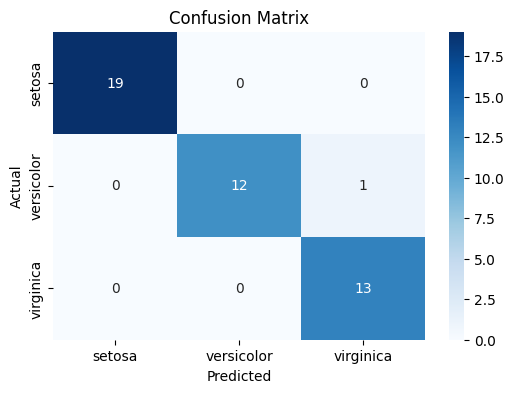

In [11]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\anmol\AppData\Local\Temp\ipykernel_39384\4123885658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


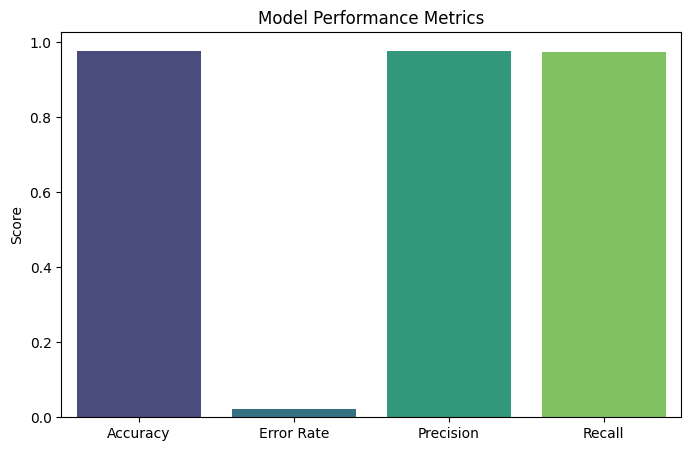

In [12]:
# Visualizing Accuracy with a Bar Chart
metrics = ['Accuracy', 'Error Rate', 'Precision', 'Recall']
values = [accuracy, error_rate, precision, recall]
plt.figure(figsize=(8,5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

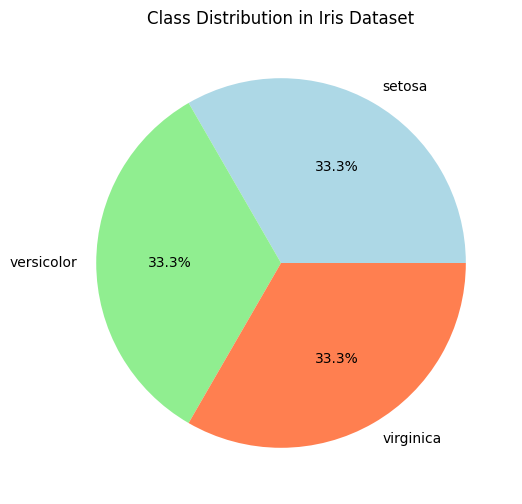

In [13]:
# Visualizing Class Distribution with a Pie Chart
plt.figure(figsize=(6,6))
data['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=iris.target_names, colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Class Distribution in Iris Dataset')
plt.ylabel('')
plt.show()

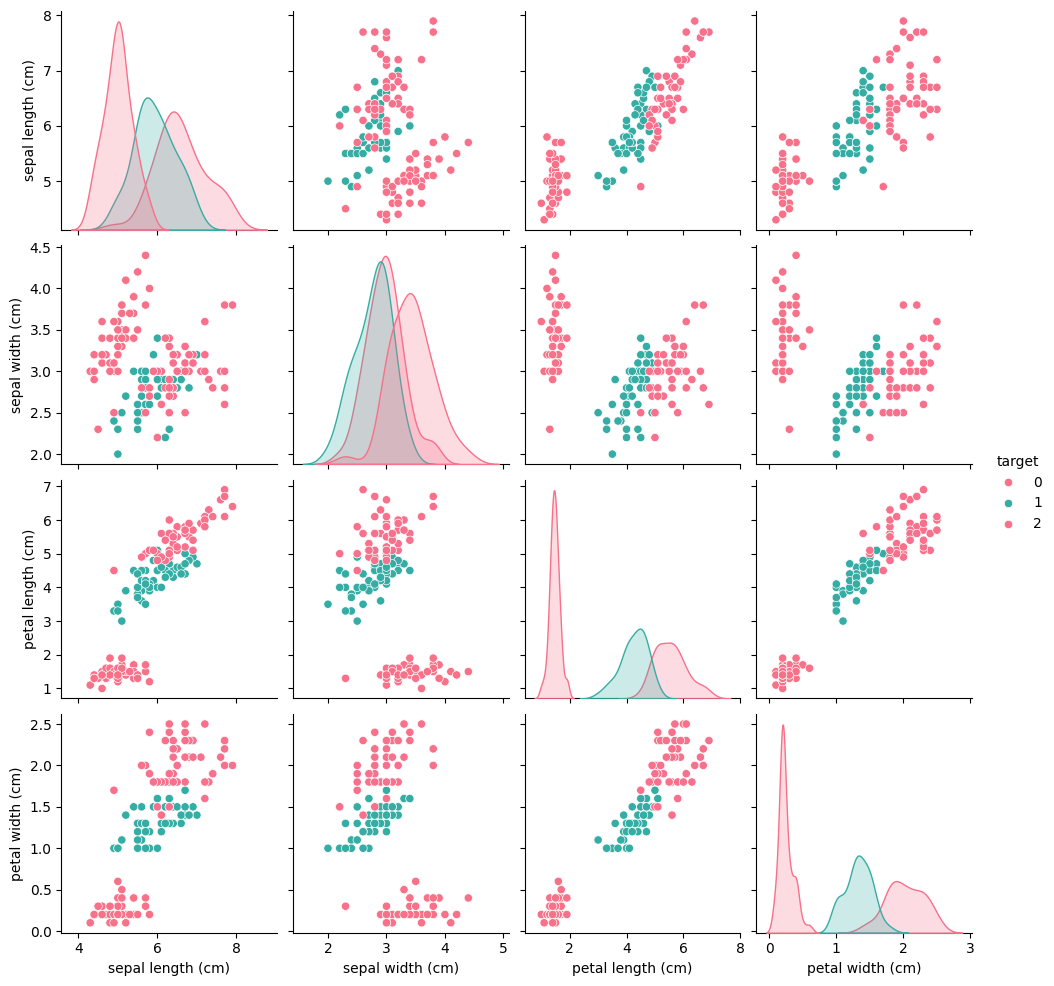

In [14]:
# Pairplot for Feature Relationships
sns.pairplot(data, hue='target', palette='husl')
plt.show()